# Deterministic Models and Optimization: Clustering methods, K-Means

**Note**: hand-made kmeans algorithm using synthetic data

In [1]:
import numpy as np
import math
from numpy import random
import pandas as pd
from sklearn.neighbors import DistanceMetric
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.set_palette("deep")


/Users/polinab/.virtualenvs/base/lib/python3.8/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
#Simulate the data

X1 = np.random.uniform(low= 0, high=25, size=(200))
X2 = np.random.uniform(low=5, high = 30, size=(200))
df = pd.DataFrame({'i': X1, 'j':X2})

In [3]:
df

,i,j
0,0.930027,20.030256
1,8.664456,17.430280
2,14.121093,7.855830
3,8.787332,9.201939
4,20.013215,20.250991
...,...,...
195,15.798704,29.151877
196,13.540792,23.884749
197,1.676299,22.763405
198,22.328374,7.544002


<AxesSubplot:xlabel='i', ylabel='j'>

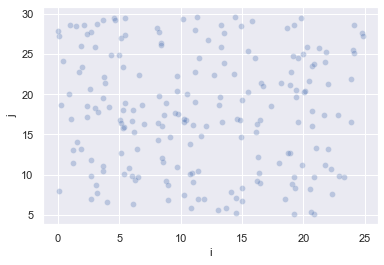

In [4]:
# fig, ax =plt.subplots(1,2, sharey=True)
sns.scatterplot(data=df,x='i', y='j', alpha=0.3)


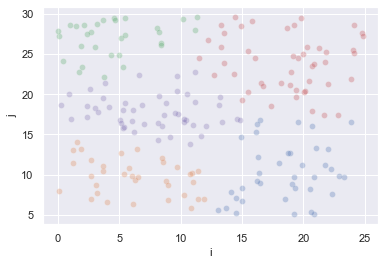

In [5]:
#using package to compare

from sklearn.cluster import KMeans

n = 5

kmeans = KMeans(n_clusters=5, random_state=0).fit(df)
df['sk_label'] = kmeans.labels_

for i in range(n):
    sns.scatterplot(data=df[df.sk_label == i],x='i', y='j', alpha=0.3)


In [6]:
# THE **from-scratch** ALGORITHM:

def means_to_np(m,n): 
    mean_array = [np.array(row) for row in m.to_numpy()]
    return mean_array

def get_centroids(d,n):
    centroids = []
    for _ in range(n):
        c = np.array([])
        for i in range(len(d.columns)):
            c = np.append(c, d.sample().values[0][i])
        centroids.append(c)
    return centroids

def euclidean(a, b):
    return sum((p-q)**2 for p, q in zip(a, b)) ** .5

def assign_clusters(d, n, c):
    centroids = c
    assignments = []
    d.drop('assignments',inplace=True,axis=1, errors='ignore')
    for x in d[[col for col in d.columns]].to_numpy():
        distances = [euclidean(x,y) for y in centroids]
        assignments.append(distances.index(min(distances)))
    d['assignments'] = pd.Series(assignments)
    return d

def mykmeans(d,n):
    c = get_centroids(d,n)
    assigned_df = assign_clusters(d,n,c)
    means = assigned_df.groupby('assignments').mean()
    mpath=means

    reassigned_df = assign_clusters(d,n,means_to_np(means,n))
    newmeans = reassigned_df.groupby('assignments').mean()
    
    diff = False
    while diff == False:
        reassigned_df = assign_clusters(d,n,means_to_np(means,n))
        newmeans = reassigned_df.groupby('assignments').mean()
        diff = means.equals(newmeans)
        mpath = mpath.append(newmeans)
        means=newmeans

    return reassigned_df,means,mpath

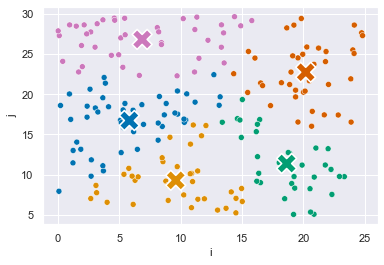

In [7]:
# implementation of 1 run with 5 clusters (no converging):
c = get_centroids(df,5)
assigned_df = assign_clusters(df,5,c)
means = assigned_df.groupby('assignments').mean()

g = sns.scatterplot(data=assigned_df,x='i',y='j',hue='assignments',palette='colorblind')
g = sns.scatterplot(data=means,x='i',y='j',hue='assignments',marker='X',s=400,palette='colorblind')
g.legend_.remove()


Text(0.5, 1.0, 'K-Means Clustering Showing "Traveling Means"')

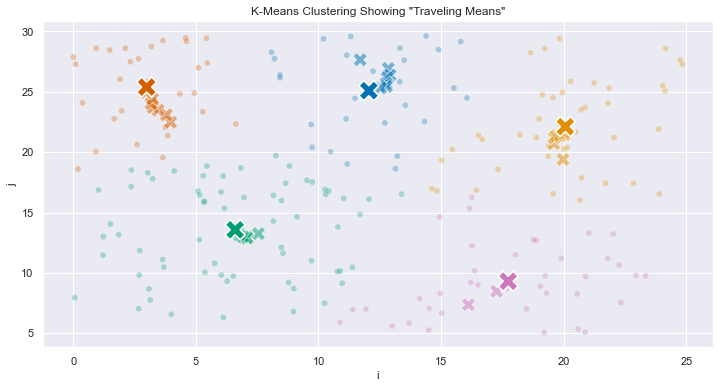

In [53]:
data,m,mpath = mykmeans(df,5)
plt.figure(figsize=(12,6))

g = sns.scatterplot(data=data,x='i',y='j',hue='assignments',palette='colorblind',alpha=0.3)
g = sns.scatterplot(data=mpath,x='i',y='j',hue='assignments',marker='X',s=200,alpha=0.5,palette='colorblind')
g = sns.scatterplot(data=m,x='i',y='j',hue='assignments',marker='X',s=400,palette='colorblind')
g.legend_.remove()
g.set_title('K-Means Clustering Showing "Traveling Means"')


In [9]:
# load data from google drive

synthetic = pd.read_csv('synthetic.txt', sep="    ", header=None)
synthetic.columns = ["i", "j"]

thyroid = pd.read_csv('thyroid.txt', sep="  ", header=None)
thyroid.apply(pd.to_numeric)
thyroid.columns = ['a', 'b','c','d','e']


<ipython-input-9-60a8ef82b1e5>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  synthetic = pd.read_csv('synthetic.txt', sep="    ", header=None)
<ipython-input-9-60a8ef82b1e5>:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  thyroid = pd.read_csv('thyroid.txt', sep="  ", header=None)


Text(0.5, 1.0, 'K-Means Clustering Showing "Traveling Means"')

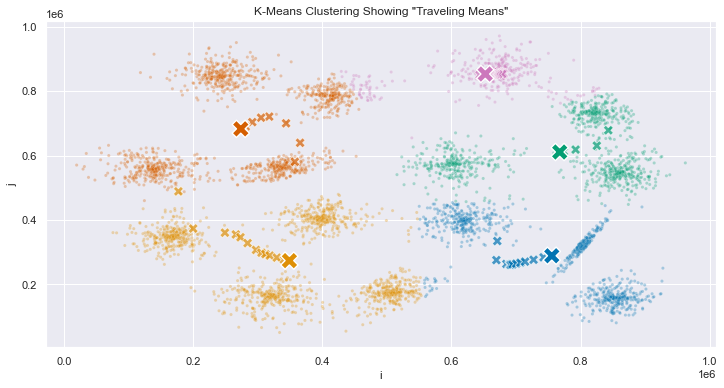

In [52]:
# implementation and visualization using class data

sdata,sm,smpath = mykmeans(synthetic,5)
plt.figure(figsize=(12,6))

g = sns.scatterplot(data=sdata,x='i',y='j',hue='assignments',alpha=0.3,s=10,palette='colorblind')
g = sns.scatterplot(data=smpath,x='i',y='j',hue='assignments',marker='X',s=100,alpha=0.7,palette='colorblind')
g = sns.scatterplot(data=sm,x='i',y='j',hue='assignments',marker='X',s=300,color='r',palette='colorblind')
g.legend_.remove()
g.set_title('K-Means Clustering Showing "Traveling Means"')



Text(0.5, 1.0, 'K-Means Clustering With K=15')

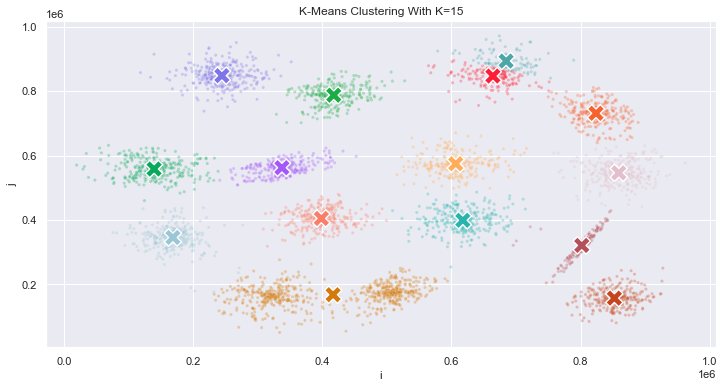

In [51]:
colors = sns.color_palette(["#D4790C", '#7D74E8','#A259F8','#09A85D',\
                           '#C5461E','#4EA6AA','#B3505A','#2AB4AE',\
                           '#FA7D68','#FE1D36','#1CAC47','#F66230',\
                           '#9CC6D6','#E2BFCA','#FEAD5B'])


sdata,sm,smpath = mykmeans(synthetic,15)
plt.figure(figsize=(12,6))

g = sns.scatterplot(data=sdata,x='i',y='j',hue='assignments',alpha=0.3,s=10,palette=colors)
# g = sns.scatterplot(data=smpath,x='i',y='j',hue='assignments',marker='X',s=100,alpha=0.7,palette='colorblind')
g = sns.scatterplot(data=sm,x='i',y='j',hue='assignments',marker='X',s=300,palette=colors)
g.legend_.remove()
g.set_title('K-Means Clustering With K=15')


In [16]:
# now for thyroid data set:

tdata,tm,tpath = mykmeans(thyroid,5)

tdata


,a,b,c,d,e,assignments
0,3195023,3455331,3497964,3068822,3206710,4
1,3651455,3412754,4131996,3248619,3603214,2
2,4716462,4051411,3638860,3150548,2946503,2
3,3347167,2433481,3075276,3150548,3058020,4
4,3042879,2859252,3004828,3166893,2859768,4
...,...,...,...,...,...,...
210,4031814,2688944,2863932,3199583,4297098,2
211,5629326,2199307,2441244,3624557,3652778,2
212,2890735,2390904,2934380,3117858,3491697,4
213,2434303,2305750,2723036,3264964,4433397,4


In [19]:
from sklearn.metrics import davies_bouldin_score

davies_bouldin_score(sdata[['i','j']], sdata.assignments)


0.667578400180327

Text(0.5, 1.0, 'Davies-Bouldin Score of K Clusters')

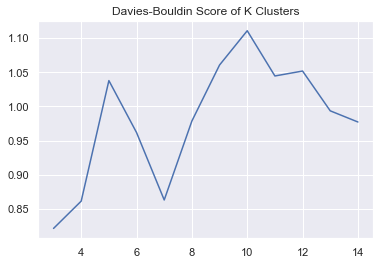

In [24]:
#index 1

davies_bouldin_score(tdata[['a','b','c','d','e']], tdata.assignments)

score = []
k = []
for n in range(3,15):
    tdata,tm,tpath = mykmeans(thyroid,n)
    k.append(n)
    score.append(davies_bouldin_score(tdata[['a','b','c','d','e']], tdata.assignments))
    
sns.lineplot(x=k,y=score).set_title('Davies-Bouldin Score of K Clusters')

# comment that 8 is best-scoring (lower) k


In [27]:
def _dunn(data=None, dist=None, labels=None):
    clusters = set(labels)
    inter_dists = [
        dist[np.ix_(labels == i, labels == j)].min()
        for i, j in _get_clust_pairs(clusters)
    ]
    intra_dists = [
        dist[np.ix_(labels == i, labels == i)].max()
        for i in clusters
    ]
    return min(inter_dists) / max(intra_dists)

def dunn(dist, labels):
    return _dunn(data=None, dist=dist, labels=labels)

In [42]:
import warnings

import numpy as np
from sklearn.metrics import (
    davies_bouldin_score, silhouette_score, calinski_harabasz_score,
    pairwise_distances
)


def _get_clust_pairs(clusters):
    return [(i, j) for i in clusters for j in clusters if i > j]


def _dunn(data=None, dist=None, labels=None):
    clusters = set(labels)
    inter_dists = [
        dist[np.ix_(labels == i, labels == j)].min()
        for i, j in _get_clust_pairs(clusters)
    ]
    intra_dists = [
        dist[np.ix_(labels == i, labels == i)].max()
        for i in clusters
    ]
    return min(inter_dists) / max(intra_dists)


def dunn(dist, labels):
    return _dunn(data=None, dist=dist, labels=labels)



def cop(data, dist, labels):
    clusters = set(labels)
    cpairs = _get_clust_pairs(clusters)
    prox_lst = [
        dist[np.ix_(labels == i[0], labels == i[1])].max()
        for i in cpairs
    ]

    out_l = []
    for c in clusters:
        c_data = data[labels == c]
        c_center = c_data.mean(axis=0, keepdims=True)
        c_intra = pairwise_distances(c_data, c_center).mean()

        c_prox = [prox for pair, prox in zip(cpairs, prox_lst) if c in pair]
        c_inter = min(c_prox)

        to_add = len(c_data) * c_intra / c_inter
        out_l.append(to_add)

    return sum(out_l) / len(labels)



def _silhouette_score2(data=None, dist=None, labels=None):
    return silhouette_score(dist, labels, 'precomputed')


def _davies_bouldin_score2(data=None, dist=None, labels=None):
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore', 'divide by zero')
        return davies_bouldin_score(data, labels)


def _calinski_harabaz_score2(data=None, dist=None, labels=None):
    return calinski_harabasz_score(data, labels)
